In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set seaborn theme for clean plots
sns.set(style="whitegrid")

In [3]:
# Function: analyze_user_engagement
# -----------------------------------------------------------------------------

def analyze_user_engagement(logs_df):
    print("Running engagement analysis...")

    # --------- Data Validation ---------
    required_columns = {'session_id', 'user_id', 'timestamp', 'duration', 'page_views', 'device_type'}
    missing = required_columns - set(logs_df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    # Ensure proper data types
    logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'], errors='coerce')
    logs_df['duration'] = pd.to_numeric(logs_df['duration'], errors='coerce')
    logs_df['page_views'] = pd.to_numeric(logs_df['page_views'], errors='coerce')

    # Drop rows with critical missing values
    logs_df.dropna(subset=['session_id', 'user_id', 'timestamp', 'duration', 'page_views'], inplace=True)

    # --------- Calculate Session Metrics ---------
    session_group = logs_df.groupby('session_id')

    # Bounce rate: % of sessions with only 1 total page view
    bounce_sessions = session_group['page_views'].sum() == 1
    bounce_rate = bounce_sessions.mean()

    # Average total session duration
    avg_session_time = session_group['duration'].sum().mean()

    # Average pages per session
    pages_per_session = session_group['page_views'].sum().mean()

    engagement_metrics = {
        'bounce_rate': round(bounce_rate, 3),
        'avg_session_time_sec': round(avg_session_time, 2),
        'pages_per_session': round(pages_per_session, 2)
    }

    # --------- Device Metrics Summary ---------
    device_metrics = logs_df.groupby('device_type').agg(
        sessions=('session_id', 'nunique'),
        avg_duration=('duration', 'mean'),
        total_page_views=('page_views', 'sum')
    ).reset_index()

    return engagement_metrics, device_metrics
    


In [4]:
# Function: plot_session_duration_distribution
def plot_session_duration_distribution(logs_df):
    """
    Plot histogram showing the distribution of total session durations.

    Parameters:
    -----------
    logs_df : pd.DataFrame
        DataFrame with session log data.

    Returns:
    --------
    None
    """
    session_duration = logs_df.groupby('session_id')['duration'].sum()
    plt.figure(figsize=(8, 5))
    sns.histplot(session_duration, bins=30, kde=True, color="skyblue")
    plt.title("Session Duration Distribution")
    plt.xlabel("Total Session Duration (seconds)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [5]:
# Function: plot_pages_per_device
def plot_pages_per_device(logs_df):
    """
    Create bar chart of total page views per device type.

    Parameters:
    -----------
    logs_df : pd.DataFrame
        DataFrame containing session logs.

    Returns:
    --------
    None
    """
    device_views = logs_df.groupby('device_type')['page_views'].sum().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(data=device_views, x='device_type', y='page_views', palette="Set2")
    plt.title("Total Page Views by Device Type")
    plt.ylabel("Page Views")
    plt.xlabel("Device Type")
    plt.tight_layout()
    plt.show()

C:\Users\sushm\AppData\Local\Temp\ipykernel_9860\1225757007.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'timestamp': pd.date_range('2025-07-01', periods=7, freq='T'),


Running engagement analysis...
Engagement Metrics:
{'bounce_rate': 0.6, 'avg_session_time_sec': 46.0, 'pages_per_session': 2.2}

 Device-Level Metrics:
  device_type  sessions  avg_duration  total_page_views
0     desktop         2          25.0                 2
1      mobile         2          40.0                 8
2      tablet         1          20.0                 1


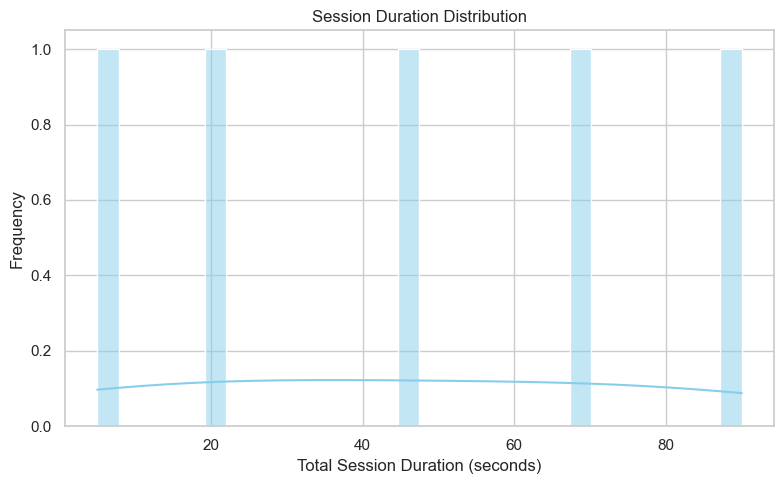

C:\Users\sushm\AppData\Local\Temp\ipykernel_9860\4158004545.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_views, x='device_type', y='page_views', palette="Set2")


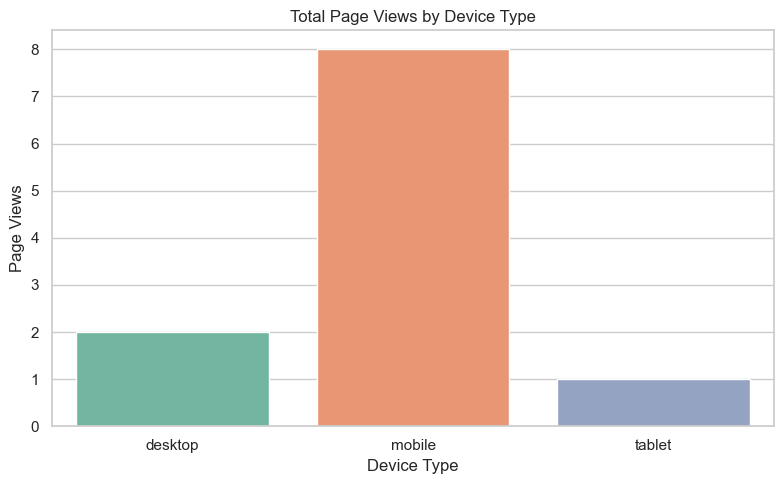

In [6]:
# Sample Test Run with Synthetic Data
# Create a sample DataFrame for demonstration
logs_df = pd.DataFrame({
    'session_id': ['s1', 's1', 's2', 's3', 's4', 's5', 's5'],
    'user_id': ['u1', 'u1', 'u2', 'u3', 'u4', 'u5', 'u5'],
    'timestamp': pd.date_range('2025-07-01', periods=7, freq='T'),
    'duration': [30, 60, 45, 20, 5, 40, 30],
    'page_views': [1, 2, 1, 1, 1, 3, 2],
    'device_type': ['mobile', 'mobile', 'desktop', 'tablet', 'desktop', 'mobile', 'mobile']
})

# Run analysis
metrics, device_summary = analyze_user_engagement(logs_df)

# Print results
print("Engagement Metrics:")
print(metrics)

print("\n Device-Level Metrics:")
print(device_summary)

# Visualizations
plot_session_duration_distribution(logs_df)
plot_pages_per_device(logs_df)